In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
happiness_df = pd.read_csv("hapiness.csv")
happiness_df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
happiness_df.shape

(158, 12)

In [4]:
happiness_df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Observations: 

1. This informs us that there is no much difference in the mean and the 50% of the data in any column.
2. Happiness rank will not contribute to the happiness score so we can drop it.
3. 

In [5]:
happiness_df.drop('Happiness Rank', axis=1, inplace=True)

In [6]:
happiness_df.head()

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [7]:
happiness_df['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

The data is maximum of sub-saharan africa and central and Eastern europe.

In [8]:
happiness_df['Country'].value_counts()

Gabon           1
Uzbekistan      1
Portugal        1
Tajikistan      1
Togo            1
               ..
North Cyprus    1
Croatia         1
Kosovo          1
Malawi          1
Sudan           1
Name: Country, Length: 158, dtype: int64

Only one data exists for a country so by this also we cannot predict the chance of happiness score based on the country.

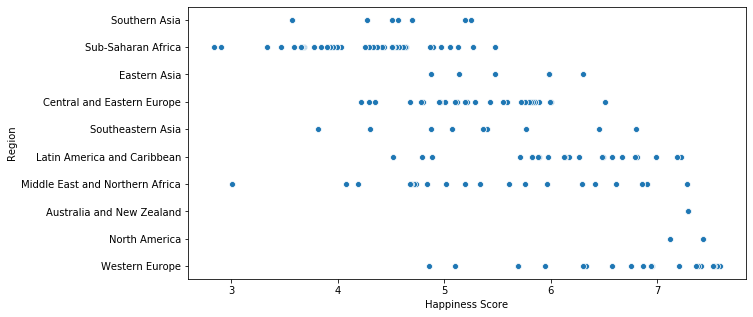

In [9]:
plt.figure(figsize=(10,5))
sns.scatterplot(y=happiness_df['Region'], x=happiness_df['Happiness Score'])

Observation:
    1. Western Europe region has the highest happiness score.
    2. Sub-Saharan Africa has pretty lower happiness score.

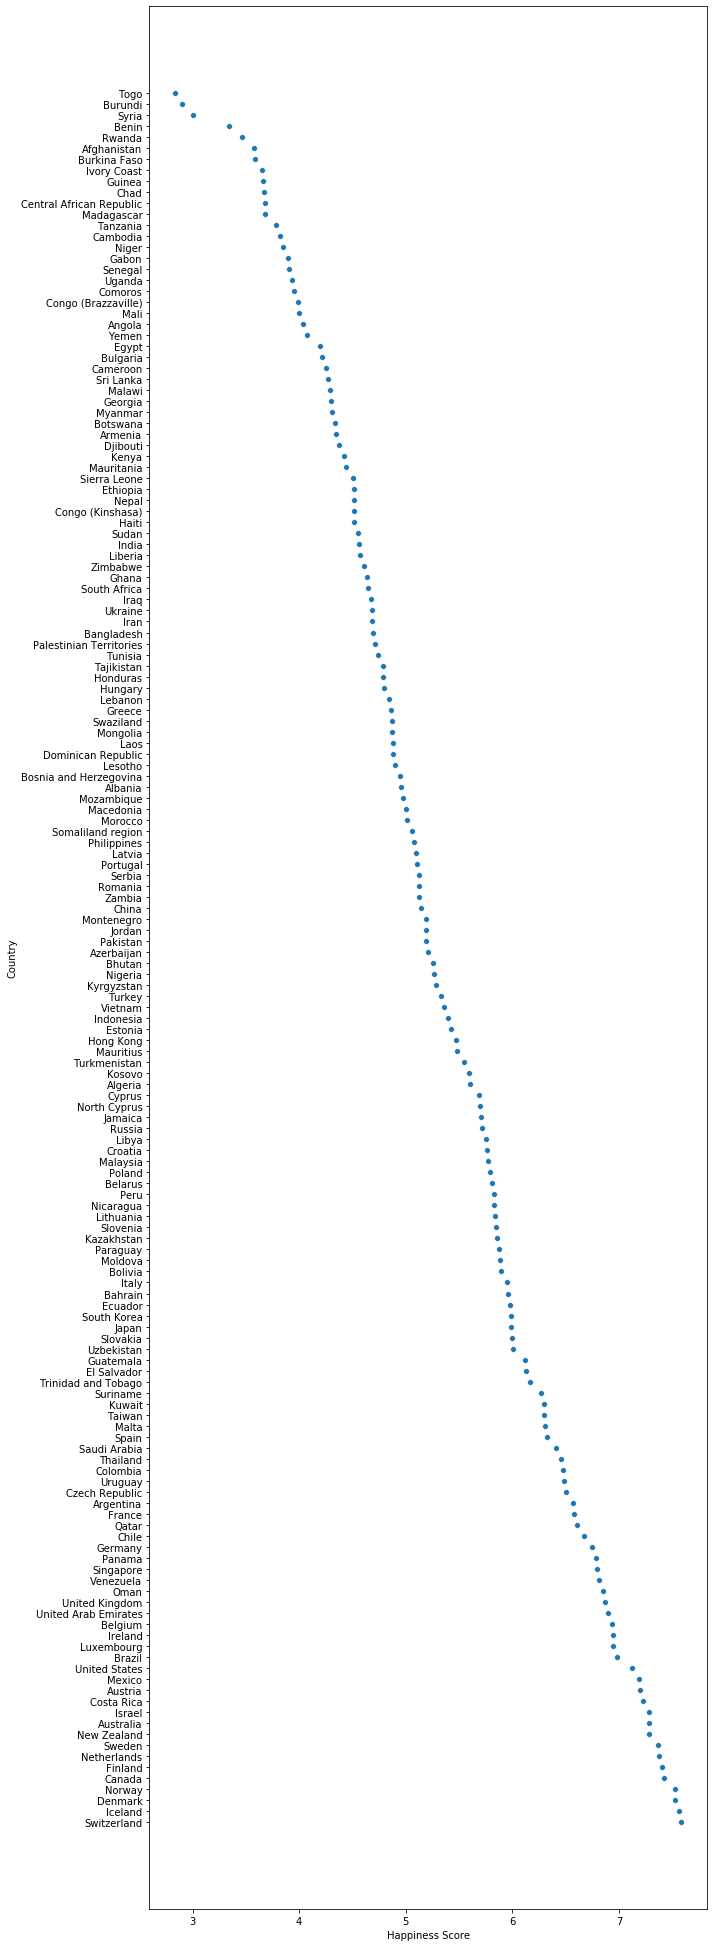

In [10]:
plt.figure(figsize=(10,35))
sns.scatterplot(y=happiness_df['Country'], x=happiness_df['Happiness Score'])

Each country has one single record and it is not telling us that country is not telling much about the happiness score.

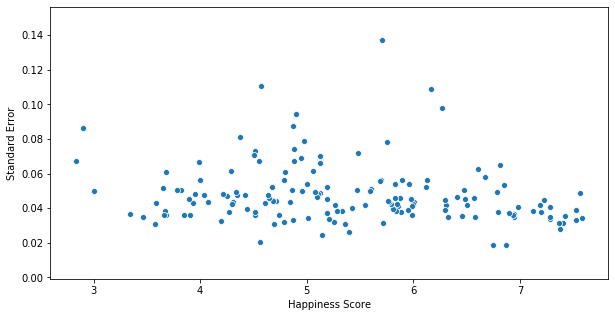

In [11]:
plt.figure(figsize=(10,5))
sns.scatterplot(y=happiness_df['Standard Error'], x=happiness_df['Happiness Score'])

Standard error is approximately same for all happiness score

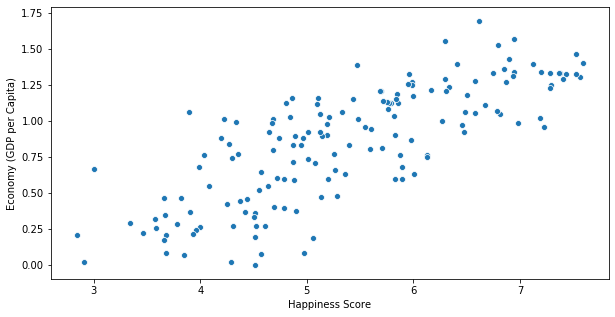

In [12]:
plt.figure(figsize=(10,5))
sns.scatterplot(y=happiness_df['Economy (GDP per Capita)'], x=happiness_df['Happiness Score'])

higher economy leads to higher happiness score.
Economy is very much contribting to happiness score.

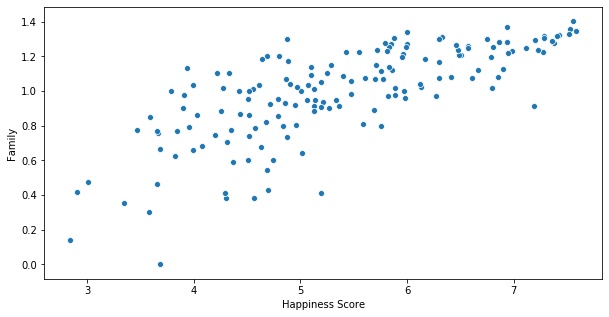

In [13]:
plt.figure(figsize=(10,5))
sns.scatterplot(y=happiness_df['Family'], x=happiness_df['Happiness Score'])

Family is contributing in the happiness score well. 

Higher family value has higer happiness score.

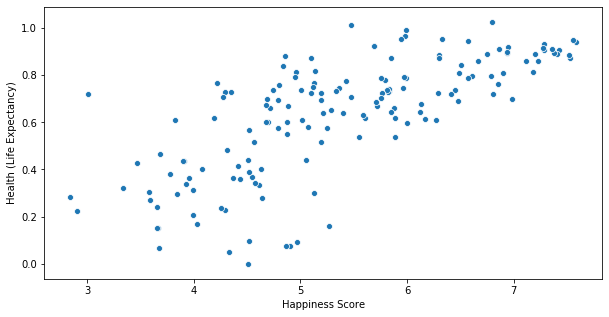

In [14]:
plt.figure(figsize=(10,5))
sns.scatterplot(y=happiness_df['Health (Life Expectancy)'], x=happiness_df['Happiness Score'])

Good health is contributing to good happiness score and seems to have a positive correlation.

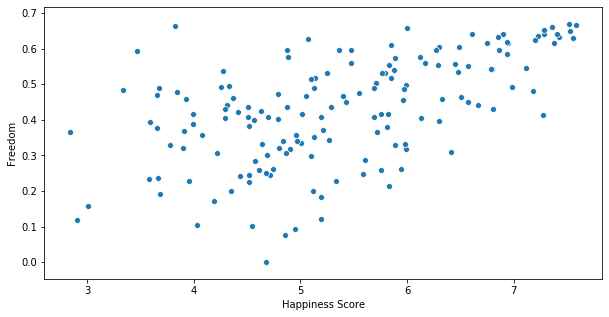

In [15]:
plt.figure(figsize=(10,5))
sns.scatterplot(y=happiness_df['Freedom'], x=happiness_df['Happiness Score'])

More the freedom more the happiness score is and this also has a good correlation with the taget variable.

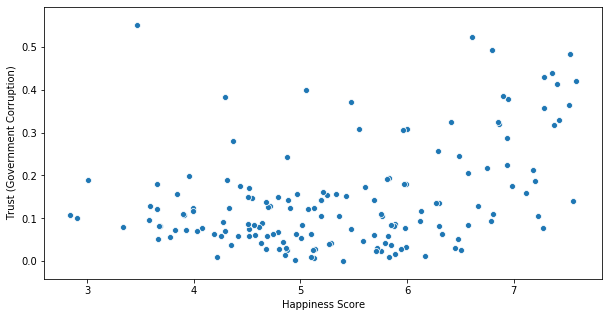

In [16]:
plt.figure(figsize=(10,5))
sns.scatterplot(y=happiness_df['Trust (Government Corruption)'], x=happiness_df['Happiness Score'])

Corruption also contributes much in the happiness score and corruption points are more scattered towards low or high happiness scores.

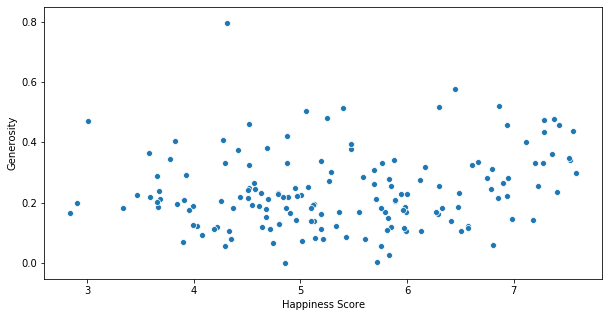

In [17]:
plt.figure(figsize=(10,5))
sns.scatterplot(y=happiness_df['Generosity'], x=happiness_df['Happiness Score'])

Generosity is mostly same for all happiness level. but it increases a bit with hogher hapiness score

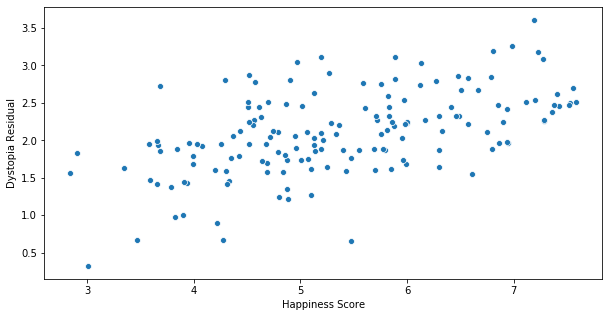

In [18]:
plt.figure(figsize=(10,5))
sns.scatterplot(y=happiness_df['Dystopia Residual'], x=happiness_df['Happiness Score'])

This imaginary country demarks that all the score of happiness are greater than this score.

(9.0, 0.0)

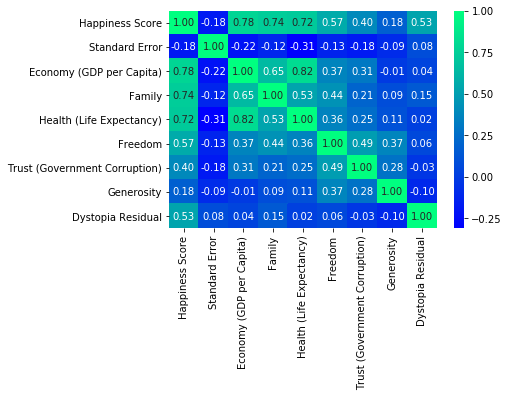

In [19]:
#Lets check the correlation of all the variables with the target variable.
corr_matrix = happiness_df.corr()
ax = sns.heatmap(corr_matrix, annot= True, cmap= 'winter', fmt='.2f')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [20]:
#Lets Label encode the other 2 columns and see what correlation we have on our target variable
from sklearn.preprocessing import StandardScaler, LabelEncoder, power_transform
lable_encode = LabelEncoder()
happiness_df=happiness_df.apply(lable_encode.fit_transform)

In [21]:
happiness_df.head()

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,156,19,151,154,148,156,150,115,125
1,58,9,155,100,136,157,150,143,98,144,134
2,37,9,154,16,139,155,128,151,153,129,122
3,105,9,153,50,153,152,132,157,143,132,118
4,24,5,152,26,140,151,140,145,141,145,116


(11.0, 0.0)

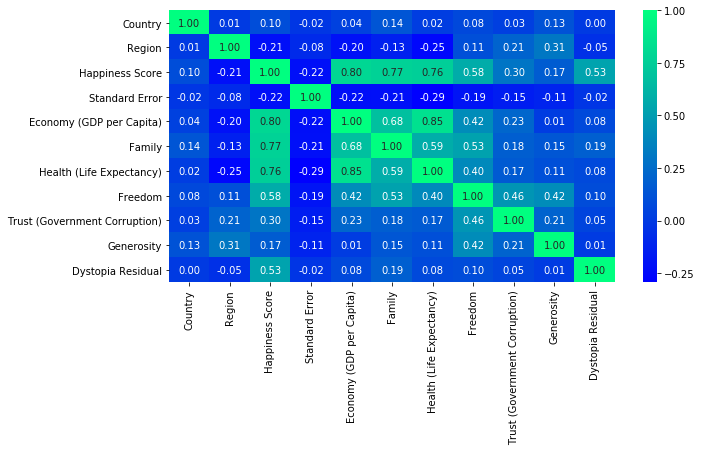

In [22]:
plt.figure(figsize=(10,5))
corr_matrix = happiness_df.corr()
ax = sns.heatmap(corr_matrix, annot= True, cmap= 'winter', fmt='.2f')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Observations:
    1. From here we see that all the variable are positively correlated with happiness score
    2. Country and Generosity is related the least as compared to other variables.
    3. Economy, Family, health, freedom and trust have major contribution to happiess score.
    4. Country have the minimal correlation of the data. Lets see the accuracy rate and check if we want to drop the column or we can go ahead.
    5. Country and region can be dropped.
    6. Health and Economy are very much correlated so we can drop health

In [23]:
happiness_df.drop('Country', inplace=True, axis=1)


In [24]:
happiness_df.drop('Region', axis=1, inplace=True)

In [25]:
happiness_df.drop('Health (Life Expectancy)', axis=1, inplace=True)

In [26]:
from sklearn import preprocessing

# separate the data from the target attributes
Y = happiness_df['Happiness Score']
X = happiness_df.drop('Happiness Score',axis=1)
# normalize the data attributes
normalized_X = preprocessing.normalize(X)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error ,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [28]:
best_rstate=0
score=0
algo_list= [LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),RandomForestRegressor(),SVR()]
for algo in algo_list:
    for i in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(normalized_X,Y,test_size=0.25,random_state=i)
        mod=algo
        mod.fit(x_train,y_train)
        y_pred=mod.predict(x_test)
        tempscore=r2_score(y_test,y_pred)
        if tempscore>score:
            score=tempscore
            best_rstate=i
    print(f"Best R2 Score {score*100} found with {algo} at random state {best_rstate} \n")

Best R2 Score 84.54507898501191 found with LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) at random state 87 

Best R2 Score 84.54507898501191 found with DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best') at random state 87 

Best R2 Score 84.54507898501191 found with KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') at random state 87 

Best R2 Score 84.54507898501191 found with AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None) at random state 8

# Hypertuning the Linear Regression

In [29]:
x_train,x_test,y_train,y_test=train_test_split(normalized_X,Y,test_size=0.20,random_state=87)
Best_Model = LinearRegression()
parameters = {"fit_intercept":['True', 'False'],"normalize":[True, False]}
gs=GridSearchCV(Best_Model,parameters)
gs.fit(x_train,y_train)
gs.best_estimator_.get_params()

{'copy_X': True, 'fit_intercept': 'True', 'n_jobs': None, 'normalize': False}

In [30]:
from sklearn.model_selection import cross_val_score

x_train,x_test,y_train,y_test=train_test_split(normalized_X,Y,test_size=0.20,random_state=87)
mod=LinearRegression()
mod.fit(x_train,y_train)
y_pred=mod.predict(x_test)
tempaccu=r2_score(y_test,y_pred)


score = cross_val_score(mod,X,Y,cv=5,scoring='r2').mean()
print("std: {}".format(score.std()))
print("cross_val_score: {}".format(score*100))

std: 0.0
cross_val_score: -171.32696885007087


In [31]:
import joblib
joblib.dump(mod, 'happiness_LinearRegression.obj')

['happiness_LinearRegression.obj']